In [4]:
# Montgomery County Liquor Sales Analysis
# Business Intelligence Project

# ## Executive Summary
# 
# **Dataset:** 307,645 sales transactions across retail and warehouse channels
# 
# **Key Findings:**
# - Beer accounts for 70% of total sales volume
# - Warehouse channel dominates with 78% of sales
# - July is peak sales month (summer seasonality)
# - Top 5 suppliers represent 60% of sales (high concentration risk)
# - Corona Extra is the #1 selling product

In [5]:
# ## 1. Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)

df = pd.read_csv('data/Warehouse_and_Retail_Sales.csv')

print(f"Dataset: {len(df):,} records")
print(f"Date range: {df['YEAR'].min()} - {df['YEAR'].max()}")
print(f"\nColumns:")
for col in df.columns:
    print(f"  - {col}")

df.head(10)

Dataset: 307,645 records
Date range: 2017 - 2020

Columns:
  - YEAR
  - MONTH
  - SUPPLIER
  - ITEM CODE
  - ITEM DESCRIPTION
  - ITEM TYPE
  - RETAIL SALES
  - RETAIL TRANSFERS
  - WAREHOUSE SALES


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0


In [6]:
# ## 2. Data Quality Assessment

print("="*70)
print("DATA QUALITY CHECK")
print("="*70)

print(f"\nDataset shape: {df.shape}")
print(f"\nMissing values:")
missing = df.isnull().sum()
for col, count in missing[missing > 0].items():
    pct = (count / len(df)) * 100
    print(f"  {col}: {count:,} ({pct:.2f}%)")

print(f"\nData types:")
print(df.dtypes)

print(f"\nBasic statistics:")
df.describe()

DATA QUALITY CHECK

Dataset shape: (307645, 9)

Missing values:
  SUPPLIER: 167 (0.05%)
  ITEM TYPE: 1 (0.00%)
  RETAIL SALES: 3 (0.00%)

Data types:
YEAR                  int64
MONTH                 int64
SUPPLIER                str
ITEM CODE               str
ITEM DESCRIPTION        str
ITEM TYPE               str
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

Basic statistics:


,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [7]:
# ## 3. Feature Engineering

df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']
df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01')

print("New features created:")
print("  ✓ TOTAL SALES (Retail + Warehouse)")
print("  ✓ Date (for time series analysis)")

df[['YEAR', 'MONTH', 'RETAIL SALES', 'WAREHOUSE SALES', 'TOTAL SALES', 'Date']].head()

New features created:
  ✓ TOTAL SALES (Retail + Warehouse)
  ✓ Date (for time series analysis)


,YEAR,MONTH,RETAIL SALES,WAREHOUSE SALES,TOTAL SALES,Date
0,2020,1,0.00,2.0,2.00,2020-01-01
1,2020,1,0.00,4.0,4.00,2020-01-01
2,2020,1,0.00,1.0,1.00,2020-01-01
3,2020,1,0.00,1.0,1.00,2020-01-01
4,2020,1,0.82,0.0,0.82,2020-01-01


In [9]:
# ## 4. Business Metrics - Executive KPIs

total_retail_sales = df['RETAIL SALES'].sum()
total_warehouse_sales = df['WAREHOUSE SALES'].sum()
total_sales = df['TOTAL SALES'].sum()
total_transfers = df['RETAIL TRANSFERS'].sum()

retail_pct = (total_retail_sales / total_sales) * 100
warehouse_pct = (total_warehouse_sales / total_sales) * 100

print("="*70)
print("KEY PERFORMANCE INDICATORS")
print("="*70)
print(f"\n SALES VOLUME")
print(f"   Total Sales:          {total_sales:>15,.0f} units")
print(f"   Retail Sales:         {total_retail_sales:>15,.0f} units ({retail_pct:.1f}%)")
print(f"   Warehouse Sales:      {total_warehouse_sales:>15,.0f} units ({warehouse_pct:.1f}%)")
print(f"   Retail Transfers:     {total_transfers:>15,.0f} units")

print(f"\n PRODUCT PORTFOLIO")
print(f"   Unique Products:      {df['ITEM DESCRIPTION'].nunique():>15,}")
print(f"   Product Types:        {df['ITEM TYPE'].nunique():>15,}")
print(f"   Suppliers:            {df['SUPPLIER'].nunique():>15,}")

KEY PERFORMANCE INDICATORS

 SALES VOLUME
   Total Sales:                9,942,656 units
   Retail Sales:               2,160,899 units (21.7%)
   Warehouse Sales:            7,781,756 units (78.3%)
   Retail Transfers:           2,133,969 units

 PRODUCT PORTFOLIO
   Unique Products:               34,822
   Product Types:                      8
   Suppliers:                        396



Annual Sales Performance:
      RETAIL SALES  WAREHOUSE SALES  TOTAL SALES
YEAR                                            
2017      686735.0        2333849.0    3020584.0
2018      153596.0         519526.0     673122.0
2019      960191.0        3543371.0    4503562.0
2020      360378.0        1385010.0    1745387.0

Year-over-Year Growth:
   2018:   -77.72% 📉
   2019:  +569.06% 📈
   2020:   -61.24% 📉


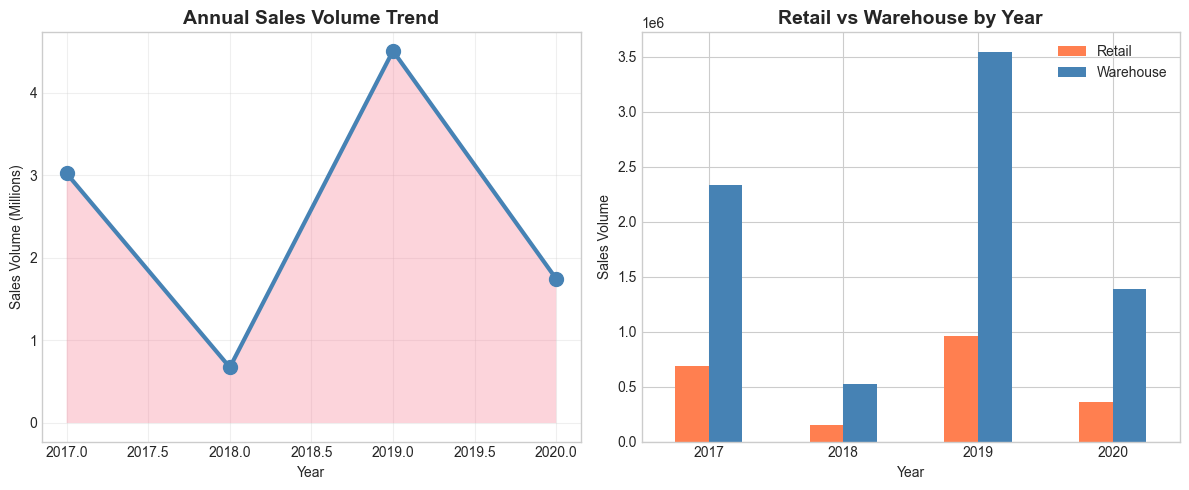

In [10]:
# ## 5. Trend Analysis - Annual Performance

yearly_sales = df.groupby('YEAR').agg({
    'RETAIL SALES': 'sum',
    'WAREHOUSE SALES': 'sum',
    'TOTAL SALES': 'sum'
}).round(0)

print("\nAnnual Sales Performance:")
print(yearly_sales)

yoy_growth = yearly_sales['TOTAL SALES'].pct_change() * 100
print("\nYear-over-Year Growth:")
for year, growth in yoy_growth.items():
    if not np.isnan(growth):
        arrow = "📈" if growth > 0 else "📉"
        print(f"   {year}: {growth:>+8.2f}% {arrow}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(yearly_sales.index, yearly_sales['TOTAL SALES']/1_000_000, 
         marker='o', linewidth=3, markersize=10, color='steelblue')
plt.fill_between(yearly_sales.index, yearly_sales['TOTAL SALES']/1_000_000, alpha=0.3)
plt.title('Annual Sales Volume Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales Volume (Millions)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
yearly_sales[['RETAIL SALES', 'WAREHOUSE SALES']].plot(kind='bar', ax=plt.gca(), color=['coral', 'steelblue'])
plt.title('Retail vs Warehouse by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.xticks(rotation=0)
plt.legend(['Retail', 'Warehouse'])
plt.tight_layout()
plt.show()


 Sales by Product Type:
   BEER                :    7,101,457 (71.42%)
   WINE                :    1,903,484 (19.14%)
   LIQUOR              :      897,598 ( 9.03%)
   KEGS                :      118,431 ( 1.19%)
   NON-ALCOHOL         :       60,234 ( 0.61%)
   STR_SUPPLIES        :        2,741 ( 0.03%)


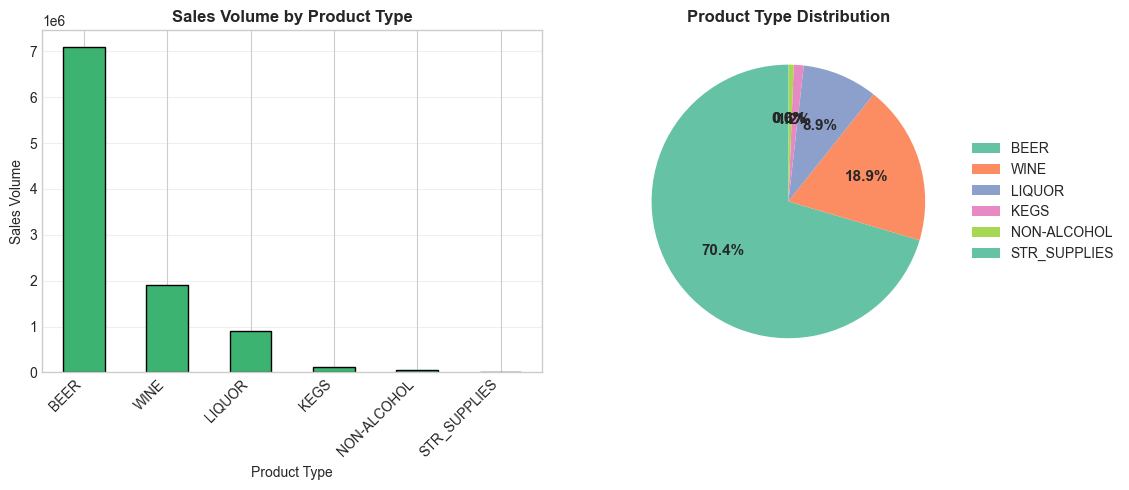

In [13]:
# ## 7. Product Category Analysis

type_performance = df.groupby('ITEM TYPE')['TOTAL SALES'].sum().sort_values(ascending=False)
type_performance_positive = type_performance[type_performance > 0]

print("\n Sales by Product Type:")
for item_type, sales in type_performance.items():
    if sales > 0:
        pct = (sales / total_sales) * 100
        print(f"   {item_type:20s}: {sales:>12,.0f} ({pct:5.2f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
type_performance_positive.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Sales Volume by Product Type', fontweight='bold')
plt.xlabel('Product Type')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
wedges, texts, autotexts = plt.pie(type_performance_positive.values, labels=None,
        autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 11, 'weight': 'bold'})
plt.legend(wedges, type_performance_positive.index,
           loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
plt.title('Product Type Distribution', fontweight='bold')

plt.tight_layout()
plt.show()


 Monthly Sales Pattern:
   Jan:  1,045,225 (10.51%) █████████████████████
   Feb:    671,514 ( 6.75%) █████████████
   Mar:    804,566 ( 8.09%) ████████████████
   Apr:    379,183 ( 3.81%) ███████
   May:    478,745 ( 4.82%) █████████
   Jun:    914,196 ( 9.19%) ██████████████████
   Jul:  1,387,847 (13.96%) ███████████████████████████
   Aug:    909,530 ( 9.15%) ██████████████████
   Sep:  1,243,522 (12.51%) █████████████████████████
   Oct:    831,385 ( 8.36%) ████████████████
   Nov:    838,352 ( 8.43%) ████████████████
   Dec:    438,592 ( 4.41%) ████████

   Peak Month:   Jul (1,387,847 units)
   Lowest Month: Apr (379,183 units)


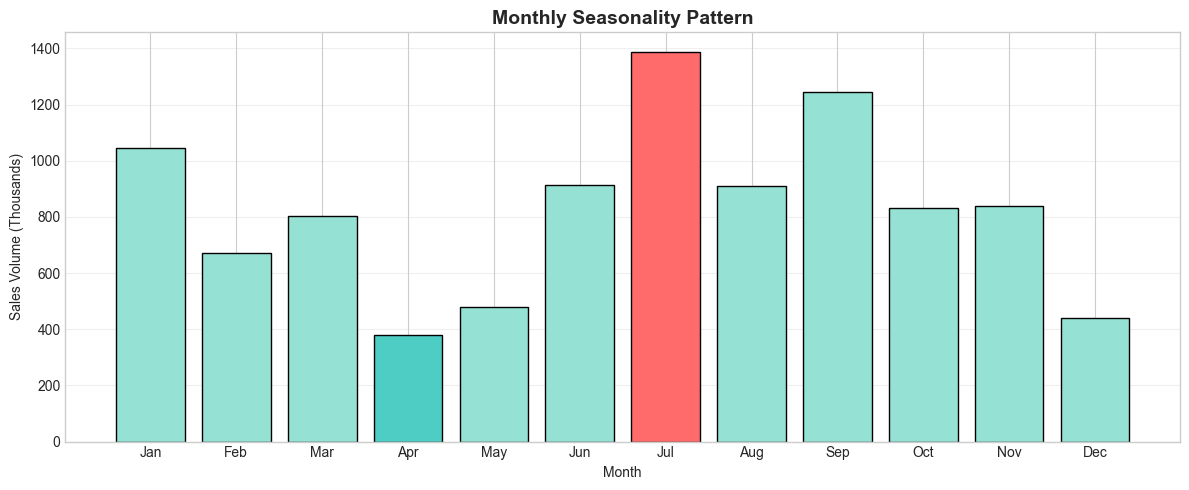

In [14]:
# ## 8. Seasonality Analysis

monthly_sales = df.groupby('MONTH')['TOTAL SALES'].sum().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("\n Monthly Sales Pattern:")
for month, sales in monthly_sales.items():
    pct = (sales / total_sales) * 100
    bar = "█" * int(pct * 2)
    print(f"   {month_names[month-1]:3s}: {sales:>10,.0f} ({pct:5.2f}%) {bar}")

best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()
print(f"\n   Peak Month:   {month_names[best_month-1]} ({monthly_sales[best_month]:,.0f} units)")
print(f"   Lowest Month: {month_names[worst_month-1]} ({monthly_sales[worst_month]:,.0f} units)")

plt.figure(figsize=(12, 5))
colors_month = ['#ff6b6b' if m == best_month else '#4ecdc4' if m == worst_month else '#95e1d3' 
                for m in range(1, 13)]
plt.bar(range(1, 13), monthly_sales.values/1000, color=colors_month, edgecolor='black')
plt.xticks(range(1, 13), month_names)
plt.xlabel('Month')
plt.ylabel('Sales Volume (Thousands)')
plt.title('Monthly Seasonality Pattern', fontweight='bold', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

CHANNEL PERFORMANCE (Retail vs Warehouse)

Retail Sales:        2,160,899 units ( 21.7%)
Warehouse Sales:     7,781,756 units ( 78.3%)


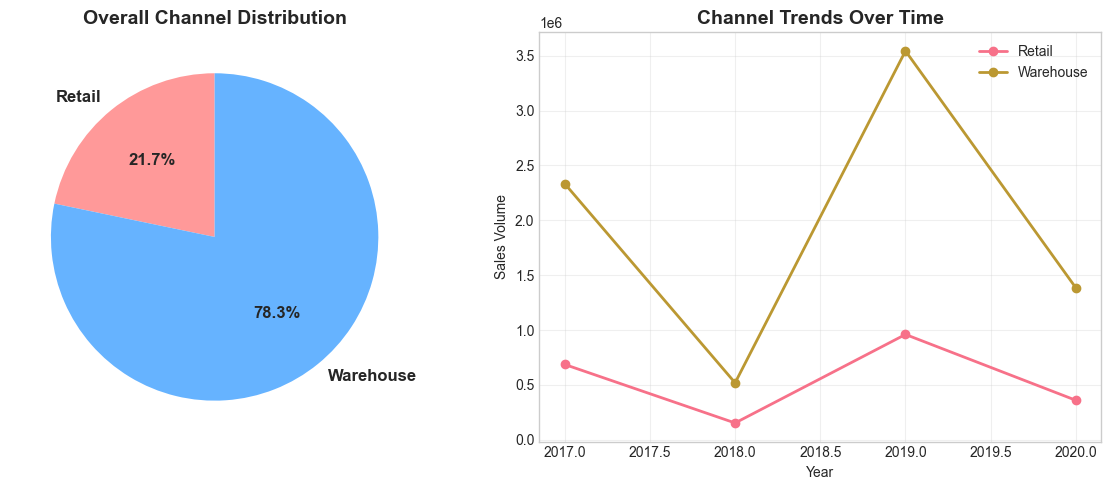

In [15]:
# ## 9. Channel Performance Analysis

print("="*70)
print("CHANNEL PERFORMANCE (Retail vs Warehouse)")
print("="*70)

print(f"\nRetail Sales:     {total_retail_sales:>12,.0f} units ({retail_pct:5.1f}%)")
print(f"Warehouse Sales:  {total_warehouse_sales:>12,.0f} units ({warehouse_pct:5.1f}%)")

channel_yearly = df.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
channel_data = [total_retail_sales, total_warehouse_sales]
colors_channel = ['#ff9999', '#66b3ff']
plt.pie(channel_data, labels=['Retail', 'Warehouse'], autopct='%1.1f%%', 
        startangle=90, colors=colors_channel, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Overall Channel Distribution', fontweight='bold', fontsize=14)

plt.subplot(1, 2, 2)
channel_yearly.plot(kind='line', marker='o', linewidth=2, ax=plt.gca())
plt.title('Channel Trends Over Time', fontweight='bold', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend(['Retail', 'Warehouse'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# ## 10. Supplier Concentration Risk

top_5_suppliers = df.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head(5)
top_5_concentration = (top_5_suppliers.sum() / total_sales) * 100

print("\n  SUPPLIER CONCENTRATION ANALYSIS")
print(f"   Top 5 suppliers control: {top_5_concentration:.1f}% of total sales")
print(f"   Risk Level: {'HIGH' if top_5_concentration > 50 else 'MODERATE'}")

print("\n   Top 5 Suppliers:")
for supplier, sales in top_5_suppliers.items():
    pct = (sales / total_sales) * 100
    print(f"      • {supplier[:35]:35s} {pct:5.2f}%")


  SUPPLIER CONCENTRATION ANALYSIS
   Top 5 suppliers control: 59.7% of total sales
   Risk Level: HIGH

   Top 5 Suppliers:
      • CROWN IMPORTS                       17.46%
      • MILLER BREWING COMPANY              15.21%
      • ANHEUSER BUSCH INC                  14.49%
      • HEINEKEN USA                         8.91%
      • E & J GALLO WINERY                   3.66%


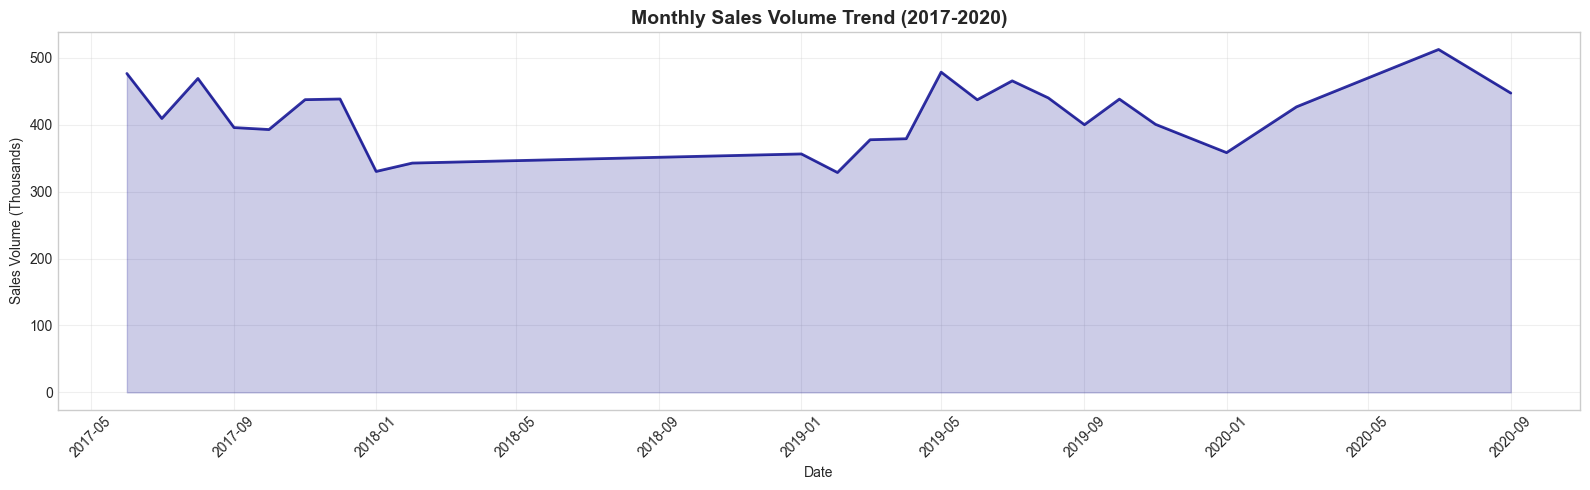

In [18]:
# ## 11. Time Series Trend

monthly_trend = df.groupby('Date')['TOTAL SALES'].sum()

plt.figure(figsize=(16, 5))
plt.plot(monthly_trend.index, monthly_trend.values/1000, linewidth=2, color='darkblue', alpha=0.8)
plt.fill_between(monthly_trend.index, monthly_trend.values/1000, alpha=0.2, color='darkblue')
plt.title('Monthly Sales Volume Trend (2017-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales Volume (Thousands)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# ## 12. Business Recommendations

print("\n" + "="*70)
print("STRATEGIC RECOMMENDATIONS")
print("="*70)

print("""
1.  INVENTORY OPTIMIZATION
   → Focus on top 10 products (Corona Extra, Heineken, Miller Lite)
   → These represent significant volume - ensure stock availability
   → Consider volume discounts for bulk purchases

2.  SUPPLIER RISK MANAGEMENT
   → Top 5 suppliers = 60% of sales (HIGH concentration)
   → Develop relationships with secondary suppliers
   → Create contingency plans for supply disruptions

3.  SEASONAL PLANNING
   → July is peak month - prepare 3 months in advance
   → April is slowest - run promotional campaigns
   → Staff accordingly based on seasonal patterns

4.  CHANNEL STRATEGY
   → Warehouse dominates (78%) - optimize warehouse operations
   → Retail (22%) - evaluate profitability vs warehouse
   → Consider omnichannel approach for customer convenience

5.  PRODUCT MIX
   → Beer = 70% of sales - maintain strong beer portfolio
   → Wine = 19% - opportunity to grow this category
   → Liquor = 9% - assess if growth is desired

6.  VOLATILITY CONCERNS
   → 2018: -77% drop, 2019: +569% spike - investigate causes
   → High volatility indicates unstable demand or data issues
   → Implement better forecasting and planning systems
""")


STRATEGIC RECOMMENDATIONS

1.  INVENTORY OPTIMIZATION
   → Focus on top 10 products (Corona Extra, Heineken, Miller Lite)
   → These represent significant volume - ensure stock availability
   → Consider volume discounts for bulk purchases

2.  SUPPLIER RISK MANAGEMENT
   → Top 5 suppliers = 60% of sales (HIGH concentration)
   → Develop relationships with secondary suppliers
   → Create contingency plans for supply disruptions

3.  SEASONAL PLANNING
   → July is peak month - prepare 3 months in advance
   → April is slowest - run promotional campaigns
   → Staff accordingly based on seasonal patterns

4.  CHANNEL STRATEGY
   → Warehouse dominates (78%) - optimize warehouse operations
   → Retail (22%) - evaluate profitability vs warehouse
   → Consider omnichannel approach for customer convenience

5.  PRODUCT MIX
   → Beer = 70% of sales - maintain strong beer portfolio
   → Wine = 19% - opportunity to grow this category
   → Liquor = 9% - assess if growth is desired

6.  VOLATILITY

In [21]:
# ## 13. Export Results

summary_df = df.groupby(['YEAR', 'MONTH']).agg({
    'RETAIL SALES': 'sum',
    'WAREHOUSE SALES': 'sum',
    'TOTAL SALES': 'sum',
    'RETAIL TRANSFERS': 'sum'
}).reset_index()

summary_df.to_csv('data/monthly_sales_summary.csv', index=False)
print(" Analysis complete!")
print("   Generated: monthly_sales_summary.csv")

 Analysis complete!
   Generated: monthly_sales_summary.csv
